In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Stat0
---

Table of contents:
- 確率変数/分布
- CLT
- Metrics

## 確率変数/確率分布
---

確率変数 e.g. $X$ ... 例えばサイコロの目  
確率分布 e.g. $U$ ... サイコロで言えばそれぞれの目の出る確率
- 例:
    - 離散一様分布(Discrete Uniform) $DU(N_{low}, N_{high})$
    - 連続一様分布(Uniform) $U(low, high)$ 
    - 正規分布(Normal)

#### 離散一様分布

In [2]:
# sample
x = np.random.choice([1, 2, 3])

x

3

Text(0.5, 0, 'x')

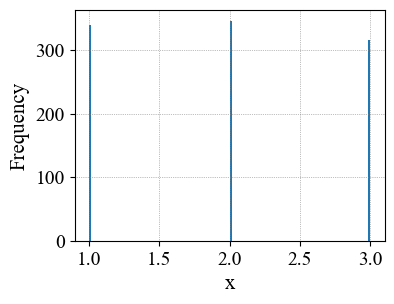

In [3]:
# sampling x100
x = np.random.choice([1, 2, 3], size=1000)

pd.Series(x).plot.hist(x, bins=100, figsize=(4, 3));
plt.xlabel("x")

#### 連続一様分布

In [4]:
x = np.random.uniform(0, 1)
x

0.986004732700621

Text(0.5, 0, 'x')

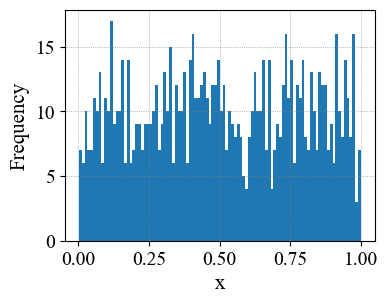

In [5]:
# sampling x100
x = np.random.uniform(0, 1, size = 1000)

pd.Series(x).plot.hist(x, bins=100, figsize=(4, 3));
plt.xlabel("x")

#### 正規分布

In [6]:
x = np.random.normal(0, 1)
x

-1.2415529658759283

Text(0.5, 0, 'x')

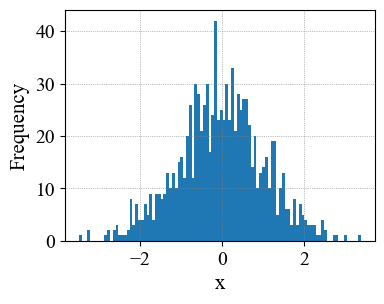

In [7]:
# sampling x100
x = np.random.normal(size=1000)

pd.Series(x).plot.hist(x, bins=100, figsize=(4, 3));
plt.xlabel("x")

## 中心極限定理
---

https://ja.wikipedia.org/wiki/中心極限定理

誤解を恐れずに要約すれば,   
`標本平均の分布はNormalに近づいていく`   
ということ.

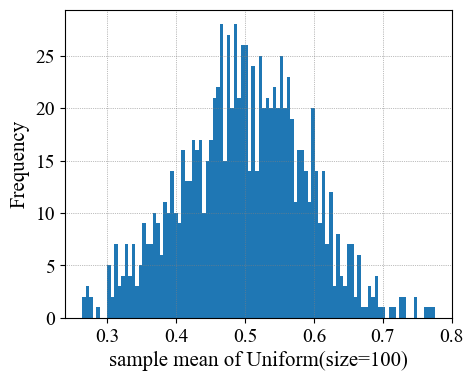

In [8]:
# 一様分布の10サンプル平均を 1000回生成する. オリジナルの分布は平坦だが、標本平均の分布をとると釣鐘状の分布になることがわかる.
def generate_sample_mean_from(originanl_dist=np.random.uniform, size=10):
    return originanl_dist(size=size).mean()

sample_means = pd.Series([generate_sample_mean_from() for i in range(1000)])
pd.Series(sample_means).plot.hist(bins=100, figsize=(5, 4));
plt.xlabel("sample mean of Uniform(size=100)");

## 確率変数を特徴付ける量
-----

### uni-variate

現実にえられるサンプルについては背後の分布がどうなっているかは未知.  
サンプルから分布についての情報を類推するための方法の一つとして、サンプルを要約した統計量をみる方法がある.  
特に**平均, 分散**は最も基本的かつ重要な量である。広く現れる正規分布を特徴付けるためにもこの2つの量がわかっていればよい.

- 標本平均: $E[X] := \frac{1}{N} \sum_i^N x_i $  ... `np.mean`
- 標本分散: $V[X] := \frac{1}{N} \sum_i^N (x_i - E[X])^2 $ ... `np.var`
- 標準偏差: $ \sigma(X) := \sqrt{(V[X])}$  ... `np.std`

In [9]:
x = np.random.normal(loc=100, scale=1, size=1000)

In [10]:
np.mean(x), np.var(x)

(100.01544612689439, 1.0711841190083577)

### multi-variate

複数の変数の間の関連性を見たいことがある. これは `共分散(Covariance)`や、これをscaleした `相関係数(Correlation)` をみる.

- 標本共分散 $Cov(X, Y) := \frac{1}{N} \sum_i^N (x_i - E[X])^2 (y_i - E[Y])^2 $
- 相関係数 $Corr(x, y) = \frac {Cov(X, Y)} {\sigma(X) \sigma(Y)}$

特に相関係数は $-1 <= Corr <= +1$ の範囲にスケールされており見やすい、よく用いいられる.

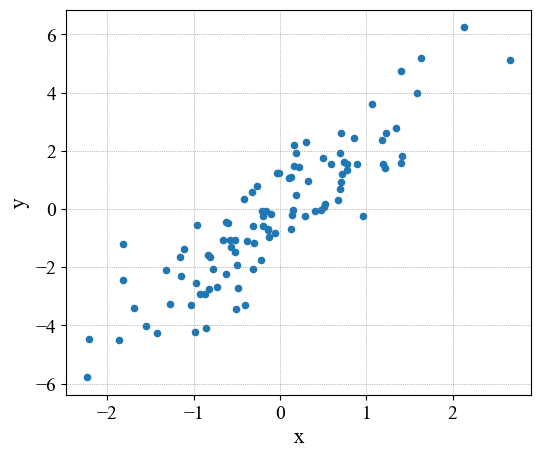

In [11]:
# genrate dataset(x, y)
x = np.random.normal(size=100)
y = 2 * x + np.random.normal(size=100)
dataset = pd.DataFrame({"x": x, "y": y})

dataset.plot.scatter(x="x", y="y", figsize=(6, 5));

上記は $Y = 2X + \epsilon$ の例. (*$\epsilon  〜 Normal(0, 1)$)  
このCorr(X, Y)は下記のように計算される:

In [12]:
# Correlation matrix
dataset.corr()

,x,y
x,1.000000,0.892086
y,0.892086,1.000000


おしなべていうと、"Xの値をしっていれば、Yの値は9割型は説明できる" という意味合い.